I will review the nutritional data of the Starbucks Food Menu in order to find any interesting insights or correlations, whether about the variables or the food items.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
df = pd.read_csv('Downloads/archive/starbucks-menu-nutrition-food.csv', encoding='utf-16', skipinitialspace=True)

Reviewing the first 5 rows of the dataset to get a sense of the data.

In [14]:
df.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


Reviewing the datasets info.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   113 non-null    object 
 1   Calories     113 non-null    int64  
 2   Fat (g)      113 non-null    float64
 3   Carb. (g)    113 non-null    int64  
 4   Fiber (g)    113 non-null    int64  
 5   Protein (g)  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [18]:
df.shape

(113, 6)

Creating a matrix to find any correlations among the variables.

In [20]:
df_numeric = df.drop(columns = [df.columns[0]])
df_corr = df_numeric.corr()

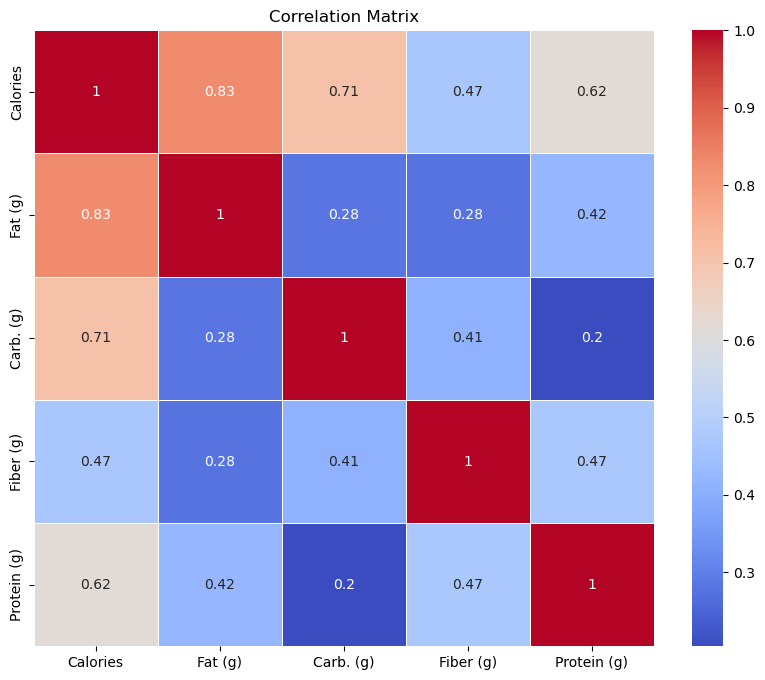

In [22]:
plt.figure(figsize = (10,8))
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm', linewidths = .5)
plt.title('Correlation Matrix')
plt.show()

There seems to be a positive correlation between fat and calories, and carbs and calories, and a smaller correlation between protein and calories, although this is not necessarily surprising.

Next, I will create a similar matrix but with plots, to see if a new pattern emerges.

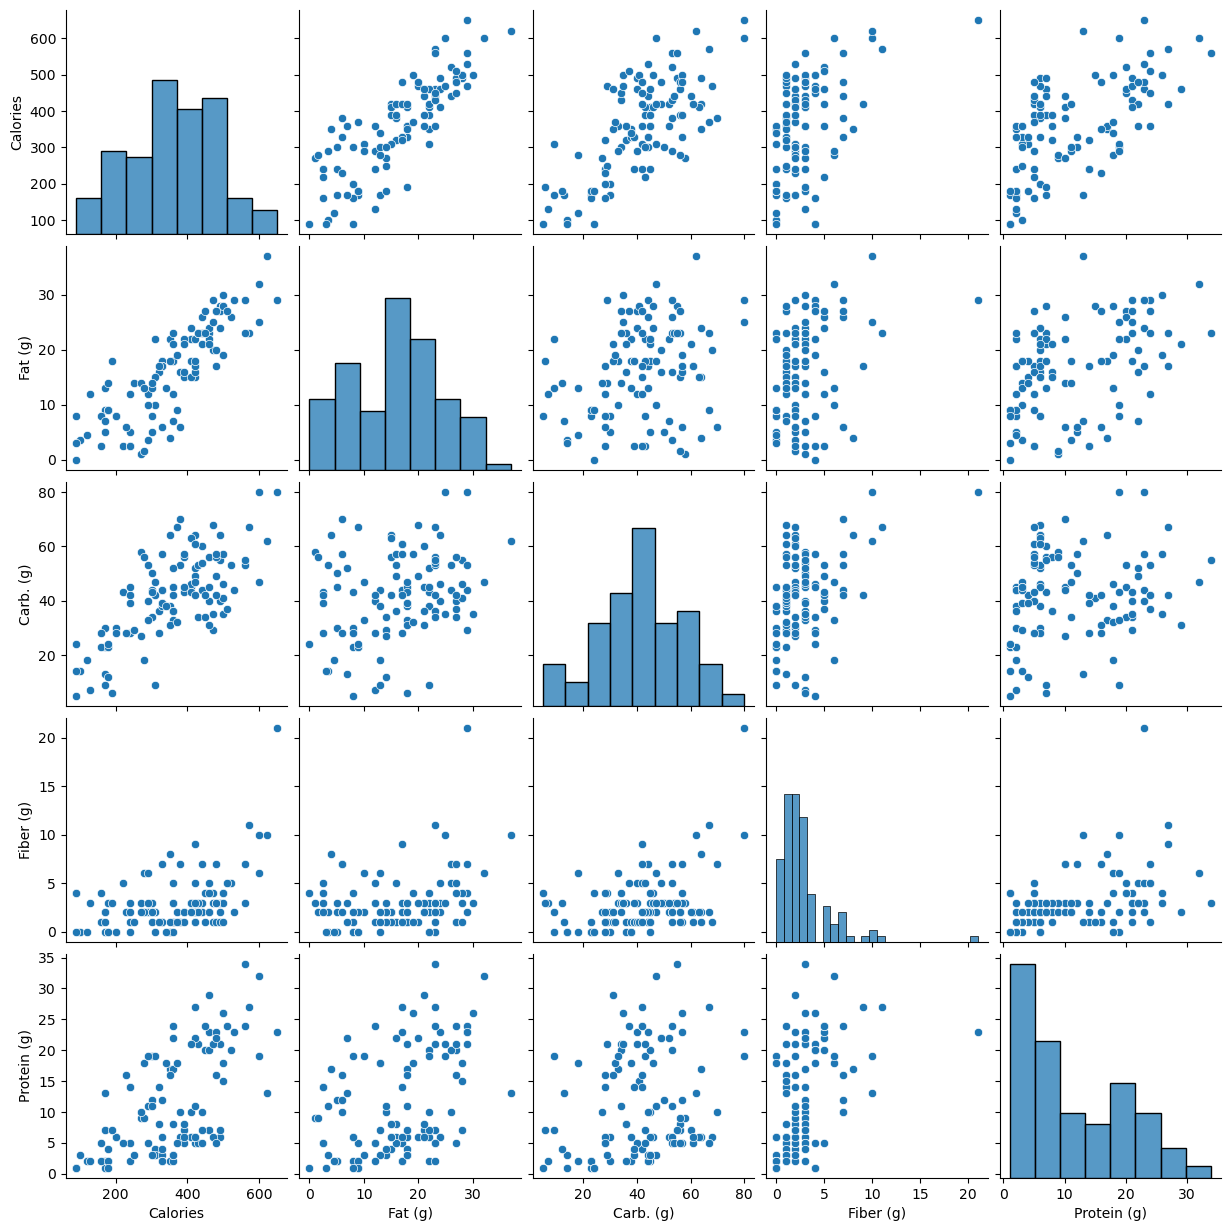

In [26]:
sns.pairplot(df)

The plots confirms the correlations in the previous matrix, but no new patterns are revealed.

Next, I will find the food items that are the most and least in each category, to see if this reveals any insights.

In [60]:
most_protein = df.loc[df['Protein (g)'].idxmax()]
least_protein = df.loc[df['Protein (g)'].idxmin()]
most_protein, least_protein

(Unnamed: 0     Turkey Pesto Panini
 Calories                       560
 Fat (g)                       23.0
 Carb. (g)                       55
 Fiber (g)                        3
 Protein (g)                     34
 HealthScore              -0.984717
 Name: 105, dtype: object,
 Unnamed: 0     Frappuccino® Cookie Straw
 Calories                              90
 Fat (g)                              3.0
 Carb. (g)                             14
 Fiber (g)                              0
 Protein (g)                            1
 HealthScore                    -0.201081
 Name: 27, dtype: object)

In [62]:
most_fiber = df.loc[df['Fiber (g)'].idxmax()]
least_fiber = df.loc[df['Fiber (g)'].idxmin()]
most_fiber, least_fiber

(Unnamed: 0     Lentils & Vegetable Protein Bowl with Brown Rice
 Calories                                                    650
 Fat (g)                                                    29.0
 Carb. (g)                                                    80
 Fiber (g)                                                    21
 Protein (g)                                                  23
 HealthScore                                           -1.117117
 Name: 102, dtype: object,
 Unnamed: 0     Butterfly Cookie
 Calories                    350
 Fat (g)                    22.0
 Carb. (g)                    38
 Fiber (g)                     0
 Protein (g)                   2
 HealthScore           -1.468577
 Name: 8, dtype: object)

In [64]:
most_carb = df.loc[df['Carb. (g)'].idxmax()]
least_carb = df.loc[df['Carb. (g)'].idxmin()]
most_carb, least_carb

(Unnamed: 0     Strawberries & Jam Sandwich
 Calories                               600
 Fat (g)                               25.0
 Carb. (g)                               80
 Fiber (g)                               10
 Protein (g)                             19
 HealthScore                      -1.564745
 Name: 54, dtype: object,
 Unnamed: 0     Organic Avocado (Spread)
 Calories                             90
 Fat (g)                             8.0
 Carb. (g)                             5
 Fiber (g)                             4
 Protein (g)                           1
 HealthScore                    -0.02574
 Name: 111, dtype: object)

In [66]:
most_fat = df.loc[df['Fat (g)'].idxmax()]
least_fat = df.loc[df['Fat (g)'].idxmin()]
most_fat, least_fat

(Unnamed: 0     Green Goddess Avocado Salad
 Calories                               620
 Fat (g)                               37.0
 Carb. (g)                               62
 Fiber (g)                               10
 Protein (g)                             13
 HealthScore                      -1.866602
 Name: 61, dtype: object,
 Unnamed: 0     Seasonal Fruit Blend
 Calories                         90
 Fat (g)                         0.0
 Carb. (g)                        24
 Fiber (g)                         4
 Protein (g)                       1
 HealthScore               -0.062857
 Name: 112, dtype: object)

In [68]:
most_calories = df.loc[df['Calories'].idxmax()]
least_calories = df.loc[df['Calories'].idxmin()]
most_calories, least_calories

(Unnamed: 0     Lentils & Vegetable Protein Bowl with Brown Rice
 Calories                                                    650
 Fat (g)                                                    29.0
 Carb. (g)                                                    80
 Fiber (g)                                                    21
 Protein (g)                                                  23
 HealthScore                                           -1.117117
 Name: 102, dtype: object,
 Unnamed: 0     Frappuccino® Cookie Straw
 Calories                              90
 Fat (g)                              3.0
 Carb. (g)                             14
 Fiber (g)                              0
 Protein (g)                            1
 HealthScore                    -0.201081
 Name: 27, dtype: object)

An interesting insight revealed by the data above is that the Green Goddess Avocado Salad, normally considered a healthy food choice, actually has the most fat on the menu, and the Lentils & Vegetable Protein Bowl with Brown Rice, also usually considered a healthy option, has the most calories on the menu.

Next, I am going to create a ranking of the top 5 healthiest and least healthiest food items, based off the categories provided. I will use a Healthscore that increases for fiber and protein, and decreases for calories, fat, and carbs.

In [44]:
from sklearn.preprocessing import MinMaxScaler


# Create criteria for healthiness
criteria = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)']

# Normalize
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric[criteria]), columns=criteria)

# Create the HealthScore column
df_normalized['HealthScore'] = df_normalized['Calories'] * -1 + df_normalized['Fat (g)'] * -1 + df_normalized['Carb. (g)'] * -1 + df_normalized['Fiber (g)'] + df_normalized['Protein (g)']

# Add the health score to the original dataframe
df['HealthScore'] = df_normalized['HealthScore']

# Sort 
top_5_healthy = df.sort_values(by='HealthScore', ascending=False).head(5)
top_5_unhealthy = df.sort_values(by='HealthScore', ascending=True).head(5)

print("Top 5 Most Healthy Items:")
print(top_5_healthy[[df.columns[0], 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)', 'HealthScore']])

print("\nTop 5 Least Healthy Items:")
print(top_5_unhealthy[[df.columns[0], 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)', 'HealthScore']])



Top 5 Most Healthy Items:
                                            Unnamed: 0  Calories  Fat (g)  \
111                           Organic Avocado (Spread)        90      8.0   
92         Sous Vide Egg Bites: Egg White & Red Pepper       170      7.0   
112                               Seasonal Fruit Blend        90      0.0   
82            Certified Gluten-Free Breakfast Sandwich       280     13.0   
87   Reduced-Fat Turkey Bacon & Cage Free Egg White...       230      6.0   

     Carb. (g)  Fiber (g)  Protein (g)  HealthScore  
111          5          4            1    -0.025740  
92          13          1           13    -0.027458  
112         24          4            1    -0.062857  
82          18          6           18    -0.063105  
87          28          2           16    -0.169045  

Top 5 Least Healthy Items:
                        Unnamed: 0  Calories  Fat (g)  Carb. (g)  Fiber (g)  \
36   Old-Fashioned Glazed Doughnut       480     27.0         56          1   
1

An interesting insight is that the Green Goddess Avocado Salad is once again shown as an unhealthy option, ranking 3rd most unhealthy. This shows that a salad can be just as unhealthy as cake (ranked 2nd and 4th), depending on its ingredients. 